In [1]:
import pandas as pd
df = pd.read_csv('/work/nextclade.csv', sep =';')
import matplotlib as plt

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (29,53,57,59,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df_vaccine = pd.read_csv('/work/us_state_vaccinations.csv')
df_vaccine = df_vaccine[df_vaccine['location'] == 'Georgia']
df_vaccine = df_vaccine[['date', 'location', 'people_vaccinated_per_hundred']]

<AxesSubplot: xlabel='date'>

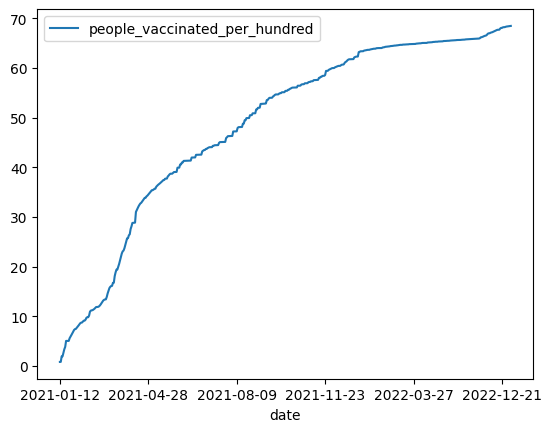

In [3]:
df_vaccine = df_vaccine.dropna()
df_vaccine.plot(x = 'date', y = 'people_vaccinated_per_hundred')
# put the top as a hundred

In [4]:
df = pd.read_csv('/work/nextclade.csv', sep =';')



/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (29,53,57,59,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df['seqName']

0        OQ520518.1 |Severe acute respiratory syndrome ...
1        OQ518713.1 |Severe acute respiratory syndrome ...
2        OQ505367.1 |Severe acute respiratory syndrome ...
3        OQ505339.1 |Severe acute respiratory syndrome ...
4        OQ505380.1 |Severe acute respiratory syndrome ...
                               ...                        
27189    MW494367.1 |Severe acute respiratory syndrome ...
27190    MW494368.1 |Severe acute respiratory syndrome ...
27191    MW494374.1 |Severe acute respiratory syndrome ...
27192    MW494389.1 |Severe acute respiratory syndrome ...
27193    MW494390.1 |Severe acute respiratory syndrome ...
Name: seqName, Length: 27194, dtype: object

In [6]:
df.head()


,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_legacy,qc.overallScore,qc.overallStatus,totalSubstitutions,...,qc.frameShifts.score,qc.frameShifts.status,qc.stopCodons.stopCodons,qc.stopCodons.totalStopCodons,qc.stopCodons.score,qc.stopCodons.status,isReverseComplement,failedGenes,warnings,errors
0,OQ520518.1 |Severe acute respiratory syndrome ...,22E,ED.3,BA.5.3.1.1.1.1.1.1.18.3,22E,Omicron,22E (Omicron),0.000000,good,80,...,0,good,NaN,0,0,good,False,NaN,NaN,NaN
1,OQ518713.1 |Severe acute respiratory syndrome ...,22E,BQ.1,BA.5.3.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,81,...,0,good,NaN,0,0,good,False,NaN,NaN,NaN
2,OQ505367.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),2.777778,good,81,...,0,good,NaN,0,0,good,False,NaN,NaN,NaN
3,OQ505339.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,82,...,0,good,NaN,0,0,good,False,NaN,NaN,NaN
4,OQ505380.1 |Severe acute respiratory syndrome ...,22B,BW.1.1,BA.5.6.2.1.1,22B,Omicron,22B (Omicron),0.000000,good,79,...,0,good,NaN,0,0,good,False,NaN,NaN,NaN


In [7]:
df[['Accension_id', 'Species', 'Pango_Lineage', 'collection_date', 'random_sampling', 'location_collected', 'nucleotide_completness']] = df['seqName'].str.split('|', expand=True)

#df.loc[:,'seqName'] = df.loc[:, 'seqName'].str.split('|', n = 7, expand=True)
#df.rename(columns={0:'Accension_id', 1:'Species', 2:'Pango_Lineage', 3:'collection_date', 4:'random_sampling', 5:'location_collected', 6:'nucleotide_completness'},inplace=True)

In [8]:
df['collection_date'] = pd.to_datetime(df['collection_date'])

In [9]:
df


,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_legacy,qc.overallScore,qc.overallStatus,totalSubstitutions,...,failedGenes,warnings,errors,Accension_id,Species,Pango_Lineage,collection_date,random_sampling,location_collected,nucleotide_completness
0,OQ520518.1 |Severe acute respiratory syndrome ...,22E,ED.3,BA.5.3.1.1.1.1.1.1.18.3,22E,Omicron,22E (Omicron),0.000000,good,80,...,NaN,NaN,NaN,OQ520518.1,Severe acute respiratory syndrome coronavirus ...,ED.3,2023-02-12,true,USA: Georgia,complete
1,OQ518713.1 |Severe acute respiratory syndrome ...,22E,BQ.1,BA.5.3.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,81,...,NaN,NaN,NaN,OQ518713.1,Severe acute respiratory syndrome coronavirus ...,BQ.1,2023-02-07,true,USA: Georgia,complete
2,OQ505367.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),2.777778,good,81,...,NaN,NaN,NaN,OQ505367.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete
3,OQ505339.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,82,...,NaN,NaN,NaN,OQ505339.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete
4,OQ505380.1 |Severe acute respiratory syndrome ...,22B,BW.1.1,BA.5.6.2.1.1,22B,Omicron,22B (Omicron),0.000000,good,79,...,NaN,NaN,NaN,OQ505380.1,Severe acute respiratory syndrome coronavirus ...,BW.1.1,2023-02-07,true,USA: Georgia,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27189,MW494367.1 |Severe acute respiratory syndrome ...,20G,B.1.2,B.1.2,20G,unassigned,20G,14.062500,good,21,...,NaN,NaN,NaN,MW494367.1,Severe acute respiratory syndrome coronavirus ...,B.1.2,2021-01-03,true,USA: Georgia,complete
27190,MW494368.1 |Severe acute respiratory syndrome ...,20A,B.1.234,B.1.234,20A,unassigned,20A,0.000000,good,16,...,NaN,NaN,NaN,MW494368.1,Severe acute respiratory syndrome coronavirus ...,B.1.234,2021-01-03,true,USA: Georgia,complete
27191,MW494374.1 |Severe acute respiratory syndrome ...,20A,B.1.234,B.1.234,20A,unassigned,20A,6.250000,good,23,...,NaN,NaN,NaN,MW494374.1,Severe acute respiratory syndrome coronavirus ...,B.1.234,2021-01-03,true,USA: Georgia,complete
27192,MW494389.1 |Severe acute respiratory syndrome ...,20G,B.1.2,B.1.2,20G,unassigned,20G,8.506944,good,21,...,NaN,NaN,NaN,MW494389.1,Severe acute respiratory syndrome coronavirus ...,B.1.2,2021-01-02,true,USA: Georgia,complete


/tmp/ipykernel_256/3333908363.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = df.groupby(df['collection_date'].dt.date)["totalSubstitutions",'totalAminoacidSubstitutions'].mean().plot(kind="line", rot=25)


<AxesSubplot: xlabel='collection_date'>

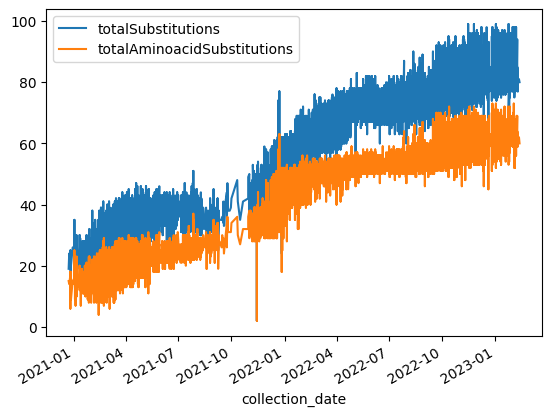

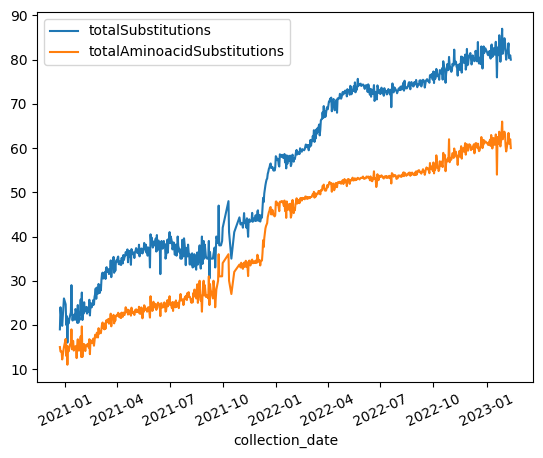

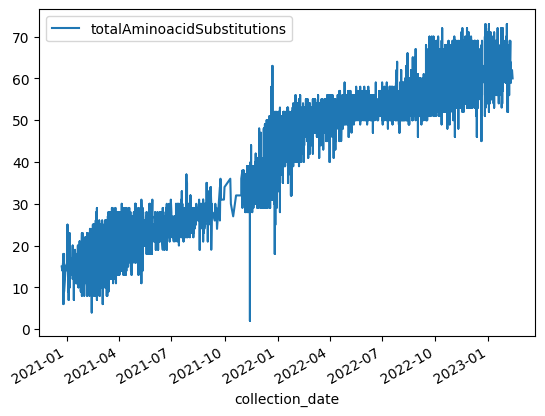

In [23]:

df.plot(x='collection_date', y = ['totalSubstitutions','totalAminoacidSubstitutions'])
ax = df.groupby(df['collection_date'].dt.date)["totalSubstitutions",'totalAminoacidSubstitutions'].mean().plot(kind="line", rot=25)
df.plot(x='collection_date', y = ['totalAminoacidSubstitutions'])
# = df.groupby(df['collection_date'].dt.date)["totalAminoacidSubstitutions"].mean().plot(kind="line", rot=25)

In [11]:
df.head()
df['Evolution_Ratio'] = (df['totalAminoacidSubstitutions'] + df['totalAminoacidDeletions'] + df['totalAminoacidInsertions'] + df['totalFrameShifts']) / (df['totalSubstitutions'] + df['totalDeletions'] + df['totalInsertions'])

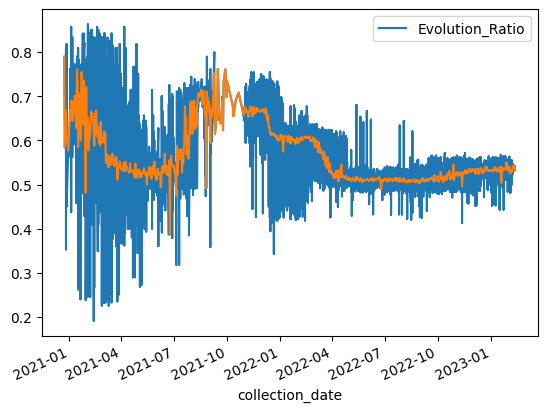

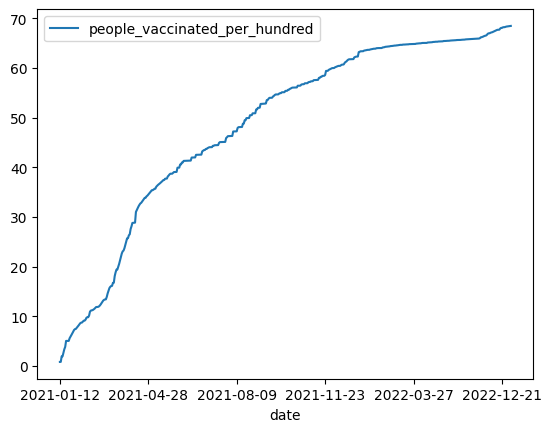

In [12]:
df.plot(x='collection_date', y='Evolution_Ratio')
ax = df.groupby(df['collection_date'].dt.date)["Evolution_Ratio"].mean().plot(kind="line", rot=25)
ax = df_vaccine.plot(x='date', y='people_vaccinated_per_hundred')


In [13]:
df.head()

,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_legacy,qc.overallScore,qc.overallStatus,totalSubstitutions,...,warnings,errors,Accension_id,Species,Pango_Lineage,collection_date,random_sampling,location_collected,nucleotide_completness,Evolution_Ratio
0,OQ520518.1 |Severe acute respiratory syndrome ...,22E,ED.3,BA.5.3.1.1.1.1.1.1.18.3,22E,Omicron,22E (Omicron),0.000000,good,80,...,NaN,NaN,OQ520518.1,Severe acute respiratory syndrome coronavirus ...,ED.3,2023-02-12,true,USA: Georgia,complete,0.532374
1,OQ518713.1 |Severe acute respiratory syndrome ...,22E,BQ.1,BA.5.3.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,81,...,NaN,NaN,OQ518713.1,Severe acute respiratory syndrome coronavirus ...,BQ.1,2023-02-07,true,USA: Georgia,complete,0.528571
2,OQ505367.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),2.777778,good,81,...,NaN,NaN,OQ505367.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.521429
3,OQ505339.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,82,...,NaN,NaN,OQ505339.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.539007
4,OQ505380.1 |Severe acute respiratory syndrome ...,22B,BW.1.1,BA.5.6.2.1.1,22B,Omicron,22B (Omicron),0.000000,good,79,...,NaN,NaN,OQ505380.1,Severe acute respiratory syndrome coronavirus ...,BW.1.1,2023-02-07,true,USA: Georgia,complete,0.524823


In [14]:
df.head()




,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_legacy,qc.overallScore,qc.overallStatus,totalSubstitutions,...,warnings,errors,Accension_id,Species,Pango_Lineage,collection_date,random_sampling,location_collected,nucleotide_completness,Evolution_Ratio
0,OQ520518.1 |Severe acute respiratory syndrome ...,22E,ED.3,BA.5.3.1.1.1.1.1.1.18.3,22E,Omicron,22E (Omicron),0.000000,good,80,...,NaN,NaN,OQ520518.1,Severe acute respiratory syndrome coronavirus ...,ED.3,2023-02-12,true,USA: Georgia,complete,0.532374
1,OQ518713.1 |Severe acute respiratory syndrome ...,22E,BQ.1,BA.5.3.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,81,...,NaN,NaN,OQ518713.1,Severe acute respiratory syndrome coronavirus ...,BQ.1,2023-02-07,true,USA: Georgia,complete,0.528571
2,OQ505367.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),2.777778,good,81,...,NaN,NaN,OQ505367.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.521429
3,OQ505339.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,82,...,NaN,NaN,OQ505339.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.539007
4,OQ505380.1 |Severe acute respiratory syndrome ...,22B,BW.1.1,BA.5.6.2.1.1,22B,Omicron,22B (Omicron),0.000000,good,79,...,NaN,NaN,OQ505380.1,Severe acute respiratory syndrome coronavirus ...,BW.1.1,2023-02-07,true,USA: Georgia,complete,0.524823


In [15]:
#mutation_Et9I_check = 'E:TI'
#df['mutation_EtI'] = df['aaSubstitutions'].apply(lambda x: 1 if mutation_Et9I_check in x else 0)
#del df['mutation_EtI']
#del df['mutation_Et9I']
df.head()


,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_legacy,qc.overallScore,qc.overallStatus,totalSubstitutions,...,warnings,errors,Accension_id,Species,Pango_Lineage,collection_date,random_sampling,location_collected,nucleotide_completness,Evolution_Ratio
0,OQ520518.1 |Severe acute respiratory syndrome ...,22E,ED.3,BA.5.3.1.1.1.1.1.1.18.3,22E,Omicron,22E (Omicron),0.000000,good,80,...,NaN,NaN,OQ520518.1,Severe acute respiratory syndrome coronavirus ...,ED.3,2023-02-12,true,USA: Georgia,complete,0.532374
1,OQ518713.1 |Severe acute respiratory syndrome ...,22E,BQ.1,BA.5.3.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,81,...,NaN,NaN,OQ518713.1,Severe acute respiratory syndrome coronavirus ...,BQ.1,2023-02-07,true,USA: Georgia,complete,0.528571
2,OQ505367.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),2.777778,good,81,...,NaN,NaN,OQ505367.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.521429
3,OQ505339.1 |Severe acute respiratory syndrome ...,22E,BQ.1.1,BA.5.3.1.1.1.1.1.1,22E,Omicron,22E (Omicron),0.000000,good,82,...,NaN,NaN,OQ505339.1,Severe acute respiratory syndrome coronavirus ...,BQ.1.1,2023-02-07,true,USA: Georgia,complete,0.539007
4,OQ505380.1 |Severe acute respiratory syndrome ...,22B,BW.1.1,BA.5.6.2.1.1,22B,Omicron,22B (Omicron),0.000000,good,79,...,NaN,NaN,OQ505380.1,Severe acute respiratory syndrome coronavirus ...,BW.1.1,2023-02-07,true,USA: Georgia,complete,0.524823


In [16]:
mutation_Q183E_check = 'Q183E'
df['mutation_Q183E'] = df['substitutions'].apply(lambda x: 1 if mutation_Q183E_check in x else 0)
mutation_K44T_check = 'K44T'
df['mutation_K44T'] = df['substitutions'].apply(lambda x: 1 if mutation_K44T_check in x else 0)

In [17]:
df['mutation_Q183E'].describe()

count    27194.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: mutation_Q183E, dtype: float64

<AxesSubplot: xlabel='collection_date'>

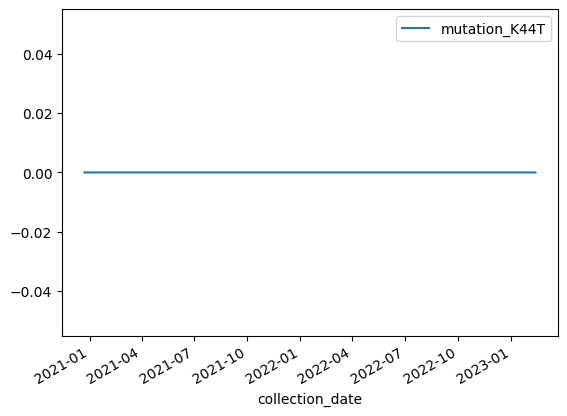

In [18]:
df.plot(x='collection_date',y='mutation_K44T')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a36d192a-9c89-4c11-8b4e-9cbb2fff3138' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>